In [3]:
from __future__ import division
import numpy as np
import dit
import matplotlib.pyplot as plt
import itertools

### Information Analysis of Improvisation Routines

THIS IS BARELY DOCUMENTED AND NOT VERY CLEAN, FEEL FREE TO DO THAT OR I CAN JUST PUSH AN UPDATED VERSION LATER ON (ARIADNA)

In [4]:
#Take video encoding and label each possible encoding from 0 to 7
one_dancer_alph = {'000': 0, '001':1, '010':2, '011' : 3, '100':4, '101' : 5, '110' : 6, '111' : 7}

##Consider the time series of both dancers jointly, take the joint encodings and label them from 0 to 63
two_dancer_alph = list(itertools.product(range(8),range(8)))
big_alph = {}
for i in range(len(two_dancer_alph)): 
    big_alph[two_dancer_alph[i]] = i

In [5]:
def mutual_info(dancerA, dancerB): 
    '''
    Compute the mutual information between the series of dancerA and dancerB.
    Inputs must be pre-processed with one_dancer_alph
    
    Parameters:
    ----------
    
    dancerA: list or 1D array
        contains the time series of dancer A
    dancerB: list or 1D array 
        contains the time series of dancer B
    
    Returns:
    --------
    
    mutual_info: float
        the mutual information between the time series of dancers A and B
    
    '''
    #
    joint_moves = list(zip(dancerA, dancerB))
    recoded_joint_moves = [big_alph[move] for move in joint_moves]
    #for move in joint_moves:
    #    recoded_joint_moves.append(big_alph[move])
    
    ha = dit.inference.entropy_2(dancerA)
    hb = dit.inference.entropy_2(dancerB)
    hab = dit.inference.entropy_2(recoded_joint_moves)
    return ha+hb-hab


def entropy_rate(moves, lmax):
    '''
    Entropy rate estimates of lengths 1 to 'lmax' of the time series 'moves'
    '''
    
    #Entropy estimates at length i
    hL = [dit.inference.entropy_2(moves, i) for i in range(lmax)]
    
    #for i in range(lmax):
    #    hL.append(dit.inference.entropy_2(moves, i))
    
    #entropy rate estimates 
    hL_diffs = []
    for i in range(lmax-1):
        hL_diffs.append(hL[i+1] -hL[i])
        
    return hL_diffs


def joint_moves(dancerA, dancerB):
    '''
    Process list of two dancers and turns into a single alphabet of 64 characters.
    '''
    
    joint_moves = list(zip(dancerA, dancerB))
    recoded_joint_moves = []
    for move in joint_moves:
        recoded_joint_moves.append(big_alph[move])
    return recoded_joint_moves

## Load videos

In [6]:
#Video 1

with open('vid1_0.5_SM.txt') as f:
    v1_SM = f.read().splitlines()
    
with open('vid1_0.5_VRV.txt') as f1:
    v1_VV = f1.read().splitlines()
    
#Video 2

with open('vid2_0.5_SH.txt') as f:
    v2_SH = f.read().splitlines()
    
with open('vid2_0.5_AV.txt') as f1:
    v2_AV = f1.read().splitlines()

#Video 4

with open('vid4_0.5_PM.txt') as f:
    v4_PM = f.read().splitlines()
    
with open('vid4_0.5_SWH.txt') as f1:
    v4_SH = f1.read().splitlines()


# Vid 1

In [7]:
dA1_SM = []
dB1_SM = []
dA1_VV = []
dB1_VV = []
for line in v1_SM[:256]:
    dat1 = line.split(',')
    dA1_SM.append(one_dancer_alph[dat1[1]])
    dB1_SM.append(one_dancer_alph[dat1[2]])
    
for line in v1_VV:
    dat = line.split(',')
    dA1_VV.append(one_dancer_alph[dat[1]])
    dB1_VV.append(one_dancer_alph[dat[2]])
    
da1sm = np.array(dA1_SM) 
db1sm = np.array(dB1_SM)
da1vv = np.array(dA1_VV)
db1vv = np.array(dB1_VV)

### SM

In [8]:
dab1_sm = joint_moves(da1sm, db1sm)
da_hmu1_sm = entropy_rate(da1sm, 10)
db_hmu1_sm = entropy_rate(db1sm, 10)
dab_hmu1_sm = entropy_rate(dab1_sm,6)
minfo1_sm = mutual_info(da1sm, db1sm)

In [9]:
print(minfo1_sm)

1.3262272366422678


In [10]:
print(da_hmu1_sm)
print(db_hmu1_sm)
print(dab_hmu1_sm)

[2.612244153199543, 1.747942412965215, 1.5134741666408393, 1.2934244558658907, 0.8403628348631846, 0.6484881608684265, 0.4062538505397093, 0.24363586033645213, 0.1564938463804566]
[2.7250629344834914, 1.6935776410652803, 1.4488590154539587, 1.0798705700981621, 0.7409461455623623, 0.5707218607035287, 0.5335974386162814, 0.39017448725035564, 0.2726396720411124]
[4.013892111389662, 2.2168739778187385, 1.4323539578760967, 0.8377618064297412, 0.48168248742596376]


### VV

In [12]:
dab1_vv = joint_moves(da1vv, db1vv)
da_hmu1_vv = entropy_rate(da1vv, 10)
db_hmu1_vv = entropy_rate(db1vv, 10)
dab_hmu1_vv = entropy_rate(dab1_vv,6)
minfo1_vv = mutual_info(da1vv, db1vv)

In [13]:
print(minfo1_vv)

1.1683142568963918


In [14]:
print(da_hmu1_vv)
print(db_hmu1_vv)
print(dab_hmu1_vv)

[2.6076706930107725, 1.8934675993516095, 1.553851719780587, 1.4012880833689607, 0.911768421038115, 0.5316009507544521, 0.30665231675187243, 0.24623275552875334, 0.1929496369893009]
[2.6105425737849313, 1.752050771894044, 1.520087979440044, 1.3722453245365323, 0.9886740842074495, 0.8069490035755873, 0.35283592915598483, 0.2191029152907209, 0.05789750696870044]
[4.052711270248207, 2.5282351880127187, 1.50870557989957, 0.7137260087567743, 0.44329871949784305]


### Plotting

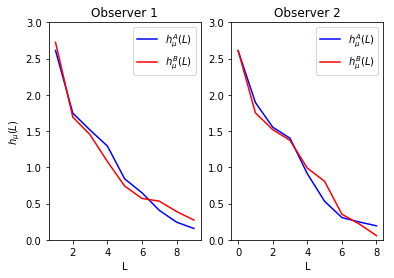

In [16]:
fig, [ax1, ax2] = plt.subplots(nrows=1,ncols=2)
ax1.plot(range(1,10), da_hmu1_sm, 'b', label=r'$h^{A}_{\mu}(L)$')
ax1.plot(range(1,10), db_hmu1_sm, 'r', label=r'$h^{B}_{\mu}(L)$')
ax1.set_xlabel('L')
ax1.set_ylabel(r'$h_{\mu}(L)$')
ax1.set_title('Observer 1')
ax1.set_ylim(0, 3)
ax1.legend()
ax2.plot(da_hmu1_vv, 'b', label=r'$h^{A}_{\mu}(L)$')
ax2.plot(db_hmu1_vv, 'r', label=r'$h^{B}_{\mu}(L)$')
ax2.set_title('Observer 2')
ax2.set_ylim(0, 3)
ax2.set_xlabel('L')
ax2.legend()
#ax2.set_ylabel(r'$h_{\mu}(L)$')
#plt.savefig('Vid_1_separate_hmu', dpi=200)
plt.show()

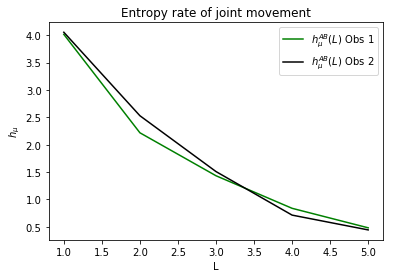

In [17]:
plt.clf()
plt.plot(range(1,6), dab_hmu1_sm, 'g', label=r'$h^{AB}_{\mu}(L)$ Obs 1')
plt.plot(range(1,6), dab_hmu1_vv, 'k', label=r'$h^{AB}_{\mu}(L)$ Obs 2')
plt.title('Entropy rate of joint movement')
plt.xlabel('L')
plt.ylabel(r'$h_\mu$')
plt.legend()
#plt.savefig('Vid_1_joint_hmu', dpi=200)
plt.show()

# Vid 2

In [18]:
dA2_SH = []
dB2_SH = []
dA2_AV = []
dB2_AV = []
for line in v2_SH:
    dat2 = line.split(',')
    dA2_SH.append(one_dancer_alph[dat2[1]])
    dB2_SH.append(one_dancer_alph[dat2[2]])
    
for line in v2_AV:
    dat3 = line.split(',')
    dA2_AV.append(one_dancer_alph[dat3[1]])
    dB2_AV.append(one_dancer_alph[dat3[2]])
    
da2sh = np.array(dA2_SH) 
db2sh = np.array(dB2_SH)
da2av = np.array(dA2_AV)
db2av = np.array(dB2_AV)

### SH

In [19]:
dab2_sh = joint_moves(da2sh, db2sh)
da_hmu2_sh = entropy_rate(da2sh, 10)
db_hmu2_sh = entropy_rate(db2sh, 10)
dab_hmu2_sh = entropy_rate(dab2_sh,6)
minfo2_sh = mutual_info(da2sh, db2sh)

In [20]:
print(minfo2_sh)

0.9613032846374896


In [21]:
print(da_hmu2_sh)
print(db_hmu2_sh)
print(dab_hmu2_sh)

[2.445932083420461, 1.3169180874827138, 1.1882476929648869, 1.0488608366873793, 0.8055566376719074, 0.8026223508079129, 0.5776148208093481, 0.4515967774775955, 0.28902529294662926]
[2.430576393446162, 1.4023840430226695, 1.2588294298809717, 1.0251615064122648, 0.8165442077779446, 0.6328726269258036, 0.5193481568451501, 0.3790686659546534, 0.1638034740917842]
[3.9121421592402768, 1.8438866472683344, 1.2257187676414345, 0.8526806927847597, 0.5133650709053477]


### AV

In [22]:
dab2_av = joint_moves(da2av, db2av)
da_hmu2_av = entropy_rate(da2av, 10)
db_hmu2_av = entropy_rate(db2av, 10)
dab_hmu2_av = entropy_rate(dab2_av,6)
minfo2_av = mutual_info(da2av, db2av)

In [23]:
print(minfo2_av)

0.6113692521558534


In [24]:
print(da_hmu2_av)
print(db_hmu2_av)
print(dab_hmu2_av)

[2.5290533084526503, 1.7390435033804716, 1.6542101660035522, 1.297268543036731, 0.9304035324788362, 0.5960118923141966, 0.4605974387430347, 0.29091245446558744, 0.11263475093939412]
[2.3813281063473335, 1.5655267164590945, 1.3549248209230624, 1.1269912426933093, 0.734823505894564, 0.5534609623828448, 0.5255240106722017, 0.37363382173643167, 0.23653703766265366]
[4.296025229193058, 2.481577833936191, 1.429327380833766, 0.7598866891661515, 0.38844658306267554]


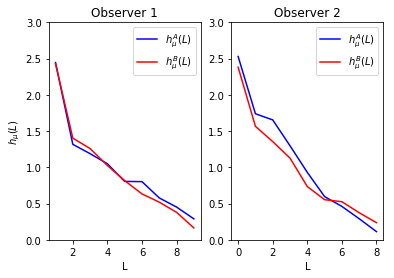

In [25]:
fig, [ax1, ax2] = plt.subplots(nrows=1,ncols=2)
ax1.plot(range(1,10), da_hmu2_sh, 'b', label=r'$h^{A}_{\mu}(L)$')
ax1.plot(range(1,10), db_hmu2_sh, 'r', label=r'$h^{B}_{\mu}(L)$')
ax1.set_xlabel('L')
ax1.set_ylabel(r'$h_{\mu}(L)$')
ax1.set_title('Observer 1')
ax1.set_ylim(0, 3)
ax1.legend()
ax2.plot(da_hmu2_av, 'b', label=r'$h^{A}_{\mu}(L)$')
ax2.plot(db_hmu2_av, 'r', label=r'$h^{B}_{\mu}(L)$')
ax2.set_title('Observer 2')
ax2.set_ylim(0, 3)
ax2.set_xlabel('L')
ax2.legend()
#ax2.set_ylabel(r'$h_{\mu}(L)$')
#plt.savefig('Vid_2_separate_hmu', dpi=200)
plt.show()

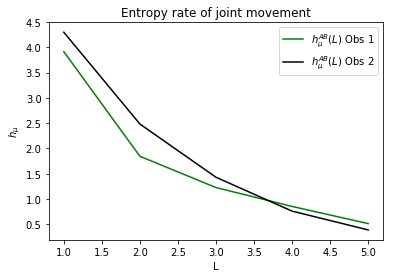

In [26]:
plt.clf()
plt.plot(range(1,6), dab_hmu2_sh, 'g', label=r'$h^{AB}_{\mu}(L)$ Obs 1')
plt.plot(range(1,6), dab_hmu2_av, 'k', label=r'$h^{AB}_{\mu}(L)$ Obs 2')
plt.title('Entropy rate of joint movement')
plt.xlabel('L')
plt.ylabel(r'$h_\mu$')
plt.legend()
#plt.savefig('Vid_2_joint_hmu', dpi=200)
plt.show()

# Vid 4

In [27]:
dA4_SH = []
dB4_SH = []
dA4_PM = []
dB4_PM = []
for line in v4_SH:
    dat4 = line.split(',')
    dA4_SH.append(one_dancer_alph[dat4[1]])
    dB4_SH.append(one_dancer_alph[dat4[2]])
    
for line in v4_PM[:261]:
    dat5 = line.split(',')
    dA4_PM.append(one_dancer_alph[dat5[1]])
    dB4_PM.append(one_dancer_alph[dat5[2]])
    
da4sh = np.array(dA4_SH) 
db4sh = np.array(dB4_SH)
da4pm = np.array(dA4_PM)
db4pm = np.array(dB4_PM)

### PM

In [28]:
dab4_pm = joint_moves(da4pm, db4pm)
da_hmu4_pm = entropy_rate(da4pm, 10)
db_hmu4_pm = entropy_rate(db4pm, 10)
dab_hmu4_pm = entropy_rate(dab4_pm,6)
minfo4_pm = mutual_info(da4pm, db4pm)

In [29]:
print(minfo4_pm)

1.1534952572705288


In [30]:
print(da_hmu4_pm)
print(db_hmu4_pm)
print(dab_hmu4_pm)

[2.8301842519395337, 1.6636311684559861, 1.530585844017632, 1.1322171249167745, 0.9356197169201392, 0.6391489117645346, 0.3809734744150628, 0.2740688562527698, 0.17222984400570773]
[2.6419299689536984, 1.6157087744386547, 1.5574340149321806, 1.1316885006991564, 0.964325240701581, 0.7664048829641903, 0.5821568316182884, 0.26785907463109204, 0.19309869885304032]
[4.315860474585211, 2.179798885438923, 1.327394405307822, 0.8132861064474488, 0.5092753962751235]


### SH

In [31]:
dab4_sh = joint_moves(da4sh, db4sh)
da_hmu4_sh = entropy_rate(da4sh, 10)
db_hmu4_sh = entropy_rate(db4sh, 10)
dab_hmu4_sh = entropy_rate(dab4_sh,6)
minfo4_sh = mutual_info(da4sh, db4sh)

In [32]:
print(minfo4_sh)

1.512742676510972


In [33]:
print(da_hmu4_sh)
print(db_hmu4_sh)
print(dab_hmu4_sh)

[2.855212299235779, 1.7128789285310244, 1.5246192097124043, 1.0545410188413156, 0.8702924896129458, 0.6183777741403009, 0.4114666748349656, 0.29901117011198863, 0.24267217134886998]
[2.6708878760235057, 1.7467809121637021, 1.559479193740379, 1.182144212534725, 0.7386330458890313, 0.5027941205919282, 0.40937196729599634, 0.2833632794812395, 0.2979355947196378]
[4.010599009710821, 2.0962736937449753, 1.3930614618535957, 0.8767684442790262, 0.5132533771120436]


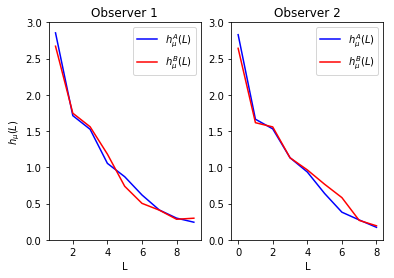

In [35]:
fig, [ax1, ax2] = plt.subplots(nrows=1,ncols=2)
ax1.plot(range(1,10), da_hmu4_sh, 'b', label=r'$h^{A}_{\mu}(L)$')
ax1.plot(range(1,10), db_hmu4_sh, 'r', label=r'$h^{B}_{\mu}(L)$')
ax1.set_xlabel('L')
ax1.set_ylabel(r'$h_{\mu}(L)$')
ax1.set_title('Observer 1')
ax1.set_ylim(0, 3)
ax1.legend()
ax2.plot(da_hmu4_pm, 'b', label=r'$h^{A}_{\mu}(L)$')
ax2.plot(db_hmu4_pm, 'r', label=r'$h^{B}_{\mu}(L)$')
ax2.set_title('Observer 2')
ax2.set_ylim(0, 3)
ax2.set_xlabel('L')
ax2.legend()
#ax2.set_ylabel(r'$h_{\mu}(L)$')
#plt.savefig('Vid_4_separate_hmu', dpi=200)
plt.show()

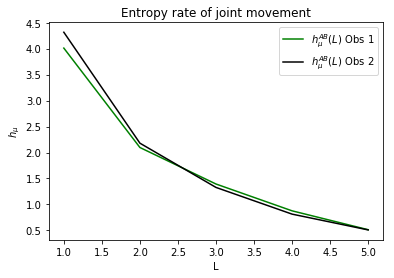

In [36]:
plt.clf()
plt.plot(range(1,6), dab_hmu4_sh, 'g', label=r'$h^{AB}_{\mu}(L)$ Obs 1')
plt.plot(range(1,6), dab_hmu4_pm, 'k', label=r'$h^{AB}_{\mu}(L)$ Obs 2')
plt.title('Entropy rate of joint movement')
plt.xlabel('L')
plt.ylabel(r'$h_\mu$')
plt.legend()
#plt.savefig('Vid_4_joint_hmu', dpi=200)
plt.show()

### Mutual Information

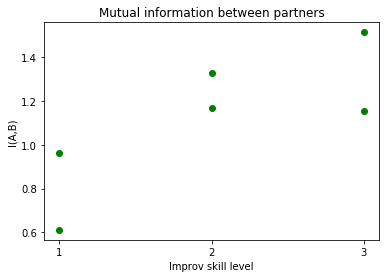

In [37]:
plt.clf()
plt.plot([1,2,3],[minfo2_av, minfo1_sm, minfo4_pm], 'go')
plt.plot([1,2,3],[minfo2_sh, minfo1_vv, minfo4_sh], 'go')
plt.title('Mutual information between partners')
plt.ylabel('I(A,B)')
plt.xlabel('Improv skill level')
plt.xticks([1,2,3])
#plt.savefig('Mutual_info', dpi=200)
plt.show()